In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 

In [3]:
df = pd.read_csv("cdr3-clones-Vasculitis-IGH_HUMAN-after-reassignment.csv", sep="\t")
df.head()

,Sample,MID,cdr3pep,freq,uniq_umis,V_sub,J_sub,sum_sites,avg_sites,read_perc,umi_perc
0,VC015V3-IgG-LIN_S23,ACGTACGT,CVRYTRIKDFWSGPIDWGQGALVT,141,84,IGHV1-8,IGHJ4,139,0.985816,51.086957,39.069767
1,VC015V3-IgG-LIN_S23,ACGTACGT,CAREDTMIQGGLDYWGQGTLVT,30,29,IGHV3-7,IGHJ4,0,0.000000,10.869565,13.488372
2,VC015V3-IgG-LIN_S23,ACGTACGT,CARRPALSGFDRPVYFDSWGQGTLVT,29,28,IGHV5-51,IGHJ4,0,0.000000,10.507246,13.023256
3,VC015V3-IgG-LIN_S23,ACGTACGT,CARHDAAAAEHFAYWGQGTLVT,10,10,IGHV4-39,IGHJ4,0,0.000000,3.623188,4.651163
4,VC015V3-IgG-LIN_S23,ACGTACGT,CAKEGVRGYFPDWGQGTLVT,9,9,IGHV3-23,IGHJ4,1,0.111111,3.260870,4.186047


In [7]:
samples = list(df["Sample"].unique())
samples

['VC015V3-IgG-LIN_S23', 'VC018V2-IgG-LIN_S22']

In [44]:
def saturationFigure(df, sample):
    # clone definition is: V, J, CDR3pep
    # Let op! Geimplementeerd als samplen met teruglegging (to discuss)
    
    # Get data for one sample
    df_s = df[df["Sample"] == sample]
    
    # Create a list with one entry per read
    reads = list()
    for index, row in df.iterrows():
        newlist = [index] * row['freq']
        reads = reads + newlist
    reads = pd.DataFrame({"clones": reads})
    
    # Sample from the list
    fraction = list()
    clones = list()
    for x in np.arange(0, 1.1, 0.1):
        df_sampled = reads.sample(frac=x)
        fraction.append(x)
        clones.append(len(df_sampled['clones'].unique()))

    # Make figure
    plt.scatter(fraction, clones)
    plt.title("Sample: " + sample)
    plt.xlabel("fraction of sample")
    plt.ylabel("unique clones")
    plt.show()

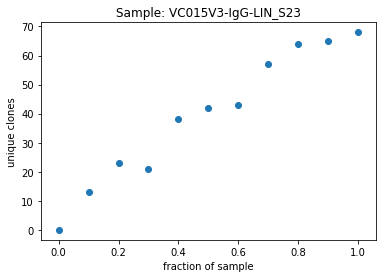

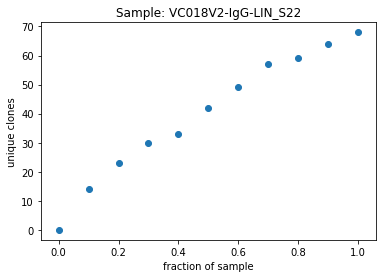

In [47]:
for sample in samples:
    saturationFigure(df, sample)